# Classifier

1. Logistic regression (https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python)


functions:
https://scikit-learn.org/stable/modules/feature_selection.html

example:
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py

tut:
https://medium.com/@GouthamPeri/pipeline-with-tuning-scikit-learn-b2789dca9dc2

https://stackoverflow.com/questions/33376078/python-feature-selection-in-pipeline-how-determine-feature-names

## Import packages

In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import random
random.seed(32)
import sklearn
# from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [2]:
df = pd.read_pickle("wordlists_lin_feat_df_withoutuserfeat_allcomments.pkl")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1606 entries, -Areopagan- to zyzee
Columns: 103888 entries, body to mrc_pmean
dtypes: float64(87790), int64(16092), object(6)
memory usage: 1.2+ GB


In [3]:
# predictors = df.columns.tolist()
# i = 0
# predictorsfile=open('predictorslist.txt','w')
# # predictorsfile.writelines(predictors)
# for element in predictors:
#     predictorsfile.write(str(i))
#     predictorsfile.write(" ")
#     predictorsfile.write(element)
#     predictorsfile.write('\n')
#     i+=1
# predictorsfile.close()

In [4]:
# multilevel columns

lst1 = (5)*["data"]
lst9 = (15-5)*["traits"]
lst10 = ["data"]
lst2 = (21-17)*["global"]
lst3 = (45-21)*["time"]
lst4 = (16103-45)*["subreddits"]
lst5 = (16116-16103)*["extra_features"]
lst6 = (96308-16116)*["word_ngrams"]
lst7 = (103829-96308)*["char_ngrams"]
lst8 = (103889-103829)*["wordlists"]
headers = lst1 + lst9  + lst10 + lst2 + lst3 + lst4 +lst5 + lst6 + lst7 + lst8 
columns = df.columns.values
print(len(headers))
print(len(columns))
arrays = [headers] + [columns]
df.columns=pd.MultiIndex.from_arrays(arrays)
print(df.columns)

103888
103888
MultiIndex([(     'data',              'body'),
            (     'data',          'doc_body'),
            (     'data',           'probody'),
            (     'data',            'tokens'),
            (     'data',        'senttokens'),
            (   'traits',     'agreeableness'),
            (   'traits',          'openness'),
            (   'traits', 'conscientiousness'),
            (   'traits',      'extraversion'),
            (   'traits',       'neuroticism'),
            ...
            ('wordlists',               'CNC'),
            ('wordlists',               'IMG'),
            ('wordlists',               'FAM'),
            ('wordlists',               'SER'),
            ('wordlists',           'valence'),
            ('wordlists',         'dominance'),
            ('wordlists',         'negations'),
            ('wordlists',          'articles'),
            ('wordlists',         'mrc_cmean'),
            ('wordlists',         'mrc_pmean')],
         

In [5]:
test = df.columns

print(test[40:50])

MultiIndex([(      'time',              '2016'),
            (      'time',              '2017'),
            (      'time',              '2018'),
            (      'time',              '2019'),
            ('subreddits',         'vikingstv'),
            ('subreddits', 'gotwinteriscoming'),
            ('subreddits',           'singing'),
            ('subreddits',          'blink182'),
            ('subreddits',             'moxun'),
            ('subreddits',        'blockchain')],
           )


In [6]:
df['traits', 'agree5'] = df['traits', 'agreeableness'].apply(lambda x: 0 if x<20 else(1 if x>19 and x<40 else(2 if x>39 and x<60 else(3 if x>59 and x<80 else 4))))
df['traits', 'openn5'] = df['traits', 'openness'].apply(lambda x: 0 if x<20 else(1 if x>19 and x<40 else(2 if x>39 and x<60 else(3 if x>59 and x<80 else 4))))
df['traits', 'consc5'] = df['traits', 'conscientiousness'].apply(lambda x: 0 if x<20 else(1 if x>19 and x<40 else(2 if x>39 and x<60 else(3 if x>59 and x<80 else 4))))
df['traits', 'extra5'] = df['traits', 'extraversion'].apply(lambda x: 0 if x<20 else(1 if x>19 and x<40 else(2 if x>39 and x<60 else(3 if x>59 and x<80 else 4))))
df['traits', 'neuro5'] = df['traits', 'neuroticism'].apply(lambda x: 0 if x<20 else(1 if x>19 and x<40 else(2 if x>39 and x<60 else(3 if x>59 and x<80 else 4))))

In [7]:
smalldf = df[['traits', 'global', 'time', 'extra_features', 'word_ngrams', 'char_ngrams', 'wordlists']]
smalldf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1606 entries, -Areopagan- to zyzee
Columns: 87829 entries, ('traits', 'agreeableness') to ('wordlists', 'mrc_pmean')
dtypes: float64(87788), int64(41)
memory usage: 1.1+ GB


In [8]:
n_bins = 20

def hist_true(df, trait):
    fig, ax = plt.subplots()
    plt.hist(df[trait], bins = 20)
    plt.title(trait, y=1.1)
    plt.xlabel("score")

# hist_true(df, "openn")

def all_hist_true(df):
    plt.figure(figsize = (16, 16))
#     plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    plt.subplot(3, 2, 1)
    plt.hist(df['traits', 'openness'], bins = 20)
    plt.title('Agreeableness')
    
    plt.subplot(3, 2, 2)
    plt.hist(df['traits', 'conscientiousness'], bins = 20)
    plt.title('Openness')
    
    plt.subplot(3, 2, 3)
    plt.hist(df['traits', 'extraversion'], bins = 20)
    plt.title('Conscientiousness')
    
    plt.subplot(3, 2, 4)
    plt.hist(df['traits', 'agreeableness'], bins = 20)
    plt.title('Extraversion')
    
    plt.subplot(3, 2, 5)
    plt.hist(df['traits', 'neuroticism'], bins = 20)
    plt.title('Neuroticism')
    
    plt.suptitle("Histograms of the true trait values")
    plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4) 
    plt.show()


## Trait

In [9]:
#split dataset in features and target variable depending on which trait to focus on
def trait(df, classes, trait_name):
    featuredf = df.drop(['data', 'traits'], axis=1, level=0)
#     df.drop('traits', axis=1)
#     featuredf = df[['global', 'time', 'subreddits', 'extra_features', 'word_ngrams', 'char_ngrams', 'wordlists']]
#     featuredf = df.loc[:, df.columns != ['data', 'traits']]
#     featuredf = df.loc[:, df.columns != 'data']
#     featuredf = featuredf.loc[:, featuredf.columns != 'traits']
    feature_cols = featuredf.columns.tolist()
    
    x = df[feature_cols] 
    
    if classes=='binary':
    
        if trait_name == 'agreeableness':
            y = df['traits', 'agree']
        elif trait_name == 'openness':
            y = df['traits', 'openn']
        elif trait_name == 'conscientiousness':
            y = df['traits', 'consc']
        elif trait_name == 'extraversion':
            y = df['traits', 'extra']
        elif trait_name == 'neuroticism':
            y = df['traits', 'neuro']   
    else:
        if trait_name == 'agreeableness':
            y = df['traits', 'agree5']
        elif trait_name == 'openness':
            y = df['traits', 'openn5']
        elif trait_name == 'conscientiousness':
            y = df['traits', 'consc5']
        elif trait_name == 'extraversion':
            y = df['traits', 'extra5']
        elif trait_name == 'neuroticism':
            y = df['traits', 'neuro5'] 
            
    
    return x,y 

## Classifier

In [10]:
# ANOVA feature selection for numeric input and categorical output

def create_pipeline(x_train, y_train, classifier, num_feat, weighted=True):
    if weighted: 
        if classifier == "log":
            pipeline = Pipeline([
              ('variance_threshold', VarianceThreshold()),
              ('feature_selection',  SelectKBest(f_classif, k=num_feat)),
              ('scaler', StandardScaler()),
              ('classification', LogisticRegression(class_weight='balanced' ,n_jobs=-1))
            ])
        elif classifier == "multilog":
            pipeline = Pipeline([
              ('variance_threshold', VarianceThreshold()),
              ('feature_selection',  SelectKBest(f_classif, k=num_feat)),
              ('scaler', StandardScaler()),
              ('classification', LogisticRegression(class_weight='balanced' ,multi_class='multinomial', solver='lbfgs', n_jobs=-1))
            ])
        elif classifier == "perceptron":
            pipeline = Pipeline([
              ('variance_threshold', VarianceThreshold()),
              ('feature_selection',  SelectKBest(f_classif, k=num_feat)),
              ('scaler', StandardScaler()),
              ('classification', Perceptron(class_weight='balanced' ,n_jobs=-1))
            ])
    else:
        if classifier == "log":
            pipeline = Pipeline([
              ('variance_threshold', VarianceThreshold()),
              ('feature_selection',  SelectKBest(f_classif, k=num_feat)),
              ('scaler', StandardScaler()),
              ('classification', LogisticRegression(n_jobs=-1))
            ])
        elif classifier == "multilog":
            pipeline = Pipeline([
              ('variance_threshold', VarianceThreshold()),
              ('feature_selection',  SelectKBest(f_classif, k=num_feat)),
              ('scaler', StandardScaler()),
              ('classification', LogisticRegression(multi_class='multinomial', solver='lbfgs', n_jobs=-1))
            ])
        elif classifier == "perceptron":
            pipeline = Pipeline([
              ('variance_threshold', VarianceThreshold()),
              ('feature_selection',  SelectKBest(f_classif, k=num_feat)),
              ('scaler', StandardScaler()),
              ('classification', Perceptron(n_jobs=-1))
            ])
        
    pipeline.fit(x_train, y_train)
    return pipeline





# logpipe = create_pipeline('log')
# y_pred=logpipe.predict(x_test)

# print("shape of x before feature selection", x.shape)
# x_new = SelectKBest(f_classif, k=30).fit_transform(x, y)
# print("shape of x after feature selection", x_new.shape)

## Get names of 30 most important features

In [11]:
# get names of the features
def get_names(x, pipeline):
    features = pipeline.named_steps['feature_selection']
    names = x.columns[features.get_support(indices=True)]
    return names
# names = get_names(logpipe)
# print(names)

### Get p-values

In [12]:
def get_pvalues(pipeline, x):
#     x_indices = np.arange(x.shape[-1])
#     selector = SelectKBest(f_classif, k=30)
#     selector.fit(x_train, y_train)
#     scores = -np.log10(selector.pvalues_)
    features = pipeline.named_steps['feature_selection']
    pvalues = features.pvalues_
#     pvalues /= pvalues.max()
    dfpvalues = pd.DataFrame(features.pvalues_)
    dfscores = pd.DataFrame(features.scores_)
    dfcolumns = pd.DataFrame(x.columns)
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores, dfpvalues],axis=1)
    featureScores.columns = ['specs','score', 'pvalue']
    featureScores.sort_values(by='pvalue')

    plt.figure(figsize = (12, 4))
    plt.subplot(1, 2, 1)
    plt.hist(pvalues, bins=20)
    plt.title('All p-values')
    plt.subplot(1, 2, 2)
    smallpvalues = pvalues[pvalues<0.1]
    plt.hist(smallpvalues, bins=10)
    plt.title('Small p-values')
    
    plt.suptitle("Histograms of the p-values")
    plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4) 
    plt.show()
    
    return featureScores

## Scores

In [13]:
def scores(y_test, y_pred, presentationtype):
    
    if presentationtype == "scores":
        accuracy=metrics.accuracy_score(y_test, y_pred)
        precision=metrics.precision_score(y_test, y_pred)
        recall=metrics.recall_score(y_test, y_pred)
        f_one=metrics.f1_score(y_test, y_pred)
        return accuracy, precision, recall, f_one
    if presentationtype == "report":
        report = classification_report(y_test, y_pred)
        return report


def score_plot(logreg, y_test, x_test):
    lr_probs = logreg.predict_proba(x_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # predict class values
#     yhat = logreg.predict(x_test)
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
#     lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

    # plot the precision-recall curves
    no_skill = len(y_test[y_test==1]) / len(y_test)
    fig, ax = plt.subplots()
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.plot(lr_recall, lr_precision, marker='.', label='Classifier')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the legend
    plt.legend()
    plt.show()
    
    return lr_precision, lr_recall


### Score plot
Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.


Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

## Create and print confusion matrix

In [14]:
def create_cnfmatrix(y_test, y_pred, plotting, detailed):
    cnfpipe_matrix = metrics.confusion_matrix(y_test, y_pred)
#     print(cnfpipe_matrix)
#     disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnfpipe_matrix)
#     disp.plot() 
    if detailed:
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
        sumpositive = tp + fn
        sumnegative = fp + tn
        sumcorrect = tp + tn
        sumwrong = fp + fn
        sumall = tn+fp+fn+tp
        print("TN, FP, FN, TP: ", tn, fp, fn, tp, "\nSum: ", sumall, "\nSum correct predictions: ", 
              sumcorrect, "Percent: ", sumcorrect/sumall, "\nSum wrong predictions: ", sumwrong, "\tPercent: ",
              sumwrong/sumall, "\nSum actual positives: ", sumpositive, "\tPercent: ", sumpositive/sumall,
              "\nSum actual negatives: ", sumnegative, "\tPercent: ", sumnegative/sumall)

    if plotting:
        %matplotlib inline
        class_names=[0,1] # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnfpipe_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("bottom")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()
        
# cnfmatrix = create_cnfmatrix(y_test, y_pred, True)

# Wrapper

In [15]:
traits = ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism']

def switching(trait):
    switcher={
            'openness':'all',
            'conscientiousness':'all',
            'agreeableness':'all',
            'extraversion':'all',
            'neuroticism':'all'
         }
    return switcher.get(trait,"Invalid")

def classify(df, classifier, classes, plotting, weighted, detailed=True):
    for trait_name in traits:
        num_feat = switching(trait_name)
        print("Trait to predict: ", trait_name)
        if classes == 'binary':
            x,y = trait(df, 'binary',trait_name)
        else:
            x,y = trait(df, 'multi', trait_name)  
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
        if detailed: 
            print("Number of authors in y_train: ", len(y_train))
            print("Number of authors in y_test: ", len(y_test))
        logpipe = create_pipeline(x_train, y_train, classifier, num_feat, weighted=True)
        y_pred=logpipe.predict(x_test)
        if detailed:
            print("Number of authors in y_pred: ", len(y_pred))
            names = get_names(x, logpipe)
            print("Names of the top", len(names), "features: \n", names, "\n")
            pvalues = get_pvalues(logpipe, x)
        #     print("p-values of", len(pvalues), "features: \n", pvalues, "\n")
            if trait_name=="openness":
                count = pvalues['pvalue'].le(0.02).sum()
            if trait_name=="conscientiousness":
                count = pvalues['pvalue'].le(0.07).sum()
            if trait_name=="extraversion":
                count = pvalues['pvalue'].le(0.05).sum()
            if trait_name=="agreeableness":
                count = pvalues['pvalue'].le(0.04).sum()
            if trait_name=="neuroticism":
                count = pvalues['pvalue'].le(0.04).sum()
            print("Number of features with this threshold: ", count)
    #         print("\nP-Values: \nNumber of features: ", 30)
    #         print(pvalues.nsmallest(count,'pvalue'))
            print("\n")
        report = scores(y_test, y_pred, "report")
        print("Classification report: \n", report)
        if (plotting and classes == 'binary'):
            cnfmatrix = create_cnfmatrix(y_test, y_pred, plotting, detailed) 
    #     accuracy, precision, recall, f_one = scores(y_test, y_pred, "scores")
    #     print("Scores:\nAccuracy:",accuracy, "\nPrecision:",precision, "\nRecall:",recall, "\nF1 score:",f_one)
            if classifier == 'log':
                lr_precision, lr_recall = score_plot(logpipe, y_test, x_test)
    #     print("Scores:\nLR_Precision:",lr_precision, "\nLR_Recall:",lr_recall)

# startnumber ngrams : 36
# startnumber wordlists: 29
# startnumber: linguistic features: 30
# startnumber: authorversion with arrays in user features: 26
# startnumber: final version 18
# start = 18

## Histogram of true traits

In [16]:
def check_imbalance(df, traits):
    length = len(df)
    o = df['traits', 'openn']
    c = df['traits', 'consc']
    e = df['traits', 'extra']
    a = df['traits', 'agree']
    n = df['traits', 'neuro']
    binarylst = [o, c, e, a, n]
    o5 = df['traits', 'openn5']
    c5 = df['traits', 'consc5']
    e5 = df['traits', 'extra5']
    a5 = df['traits', 'agree5']
    n5 = df['traits', 'neuro5']
    multilst = [o5, c5, e5, a5, n5]
    
    result = []
    for trait in binarylst: 
        result.append(np.bincount(trait) / length)
    result5 = []
    for trait in multilst:
        result5.append(np.bincount(trait) / len(trait))
    
    print("Distribution of the true trait values in the classes (in %):\n")
    for i in range(len(traits)):
        print(traits[i], "\n\tBinary: ", result[i], "\n\t5 classes: ", result5[i], "\n")
    
#     result =np.bincount(o) / len(o)
#     result5 =np.bincount(o5) / len(o)
#     print("Openness\n\tBinary: ", result, "\n\t5 classes: ", result5)

    
check_imbalance(df, traits)

Distribution of the true trait values in the classes (in %):

openness 
	Binary:  [0.2864259 0.7135741] 
	5 classes:  [0.12515567 0.09900374 0.16874222 0.21855542 0.38854296] 

conscientiousness 
	Binary:  [0.62079701 0.37920299] 
	5 classes:  [0.3486924  0.18617684 0.17185554 0.11955168 0.17372354] 

extraversion 
	Binary:  [0.64570361 0.35429639] 
	5 classes:  [0.40161893 0.17496887 0.16562889 0.10958904 0.14819427] 

agreeableness 
	Binary:  [0.56351183 0.43648817] 
	5 classes:  [0.33125778 0.16811955 0.16998755 0.15379826 0.17683686] 

neuroticism 
	Binary:  [0.49377335 0.50622665] 
	5 classes:  [0.26027397 0.14259029 0.16998755 0.14321295 0.28393524] 



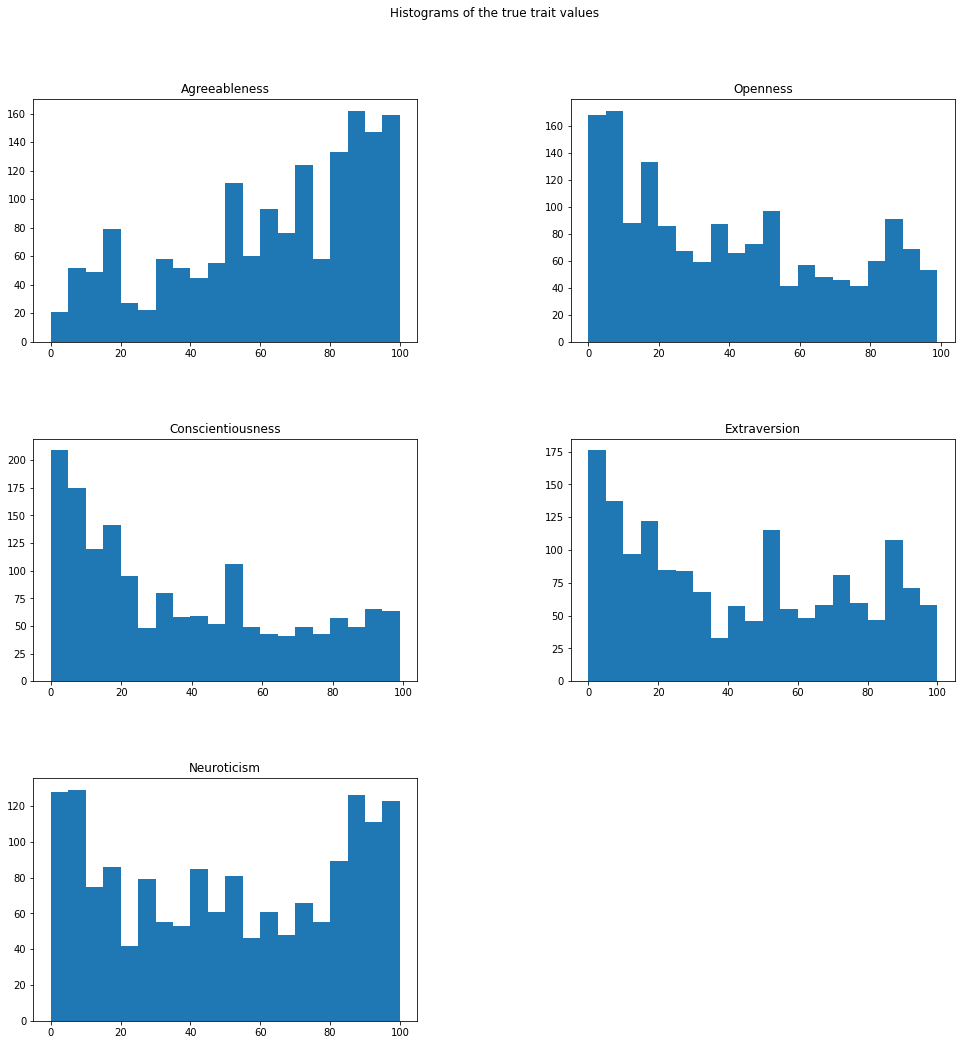

In [17]:
# true histogram plots
all_hist_true(df)

In [18]:
# %%javascript
# IPython.OutputArea.auto_scroll_threshold = 1000;

## Test set: binary outcome

Trait to predict:  openness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.25      0.35      0.29       105
           1       0.73      0.62      0.67       297

    accuracy                           0.55       402
   macro avg       0.49      0.49      0.48       402
weighted avg       0.61      0.55      0.57       402



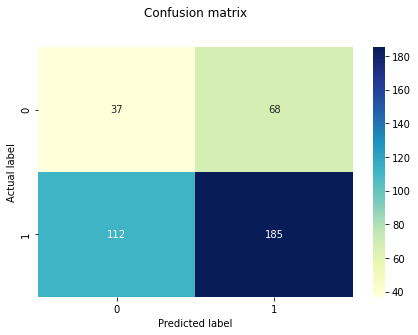

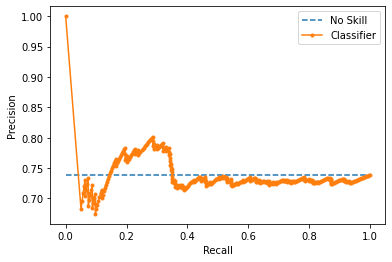

Trait to predict:  conscientiousness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.66      0.66      0.66       251
           1       0.43      0.42      0.43       151

    accuracy                           0.57       402
   macro avg       0.54      0.54      0.54       402
weighted avg       0.57      0.57      0.57       402



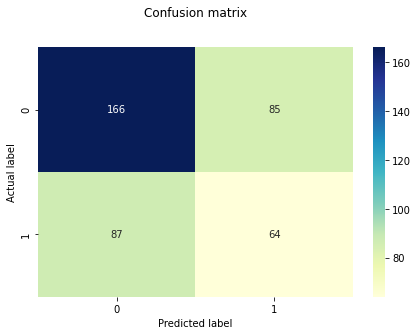

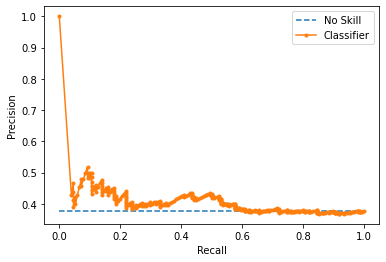

Trait to predict:  extraversion


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.68      0.61      0.64       258
           1       0.41      0.48      0.44       144

    accuracy                           0.56       402
   macro avg       0.54      0.55      0.54       402
weighted avg       0.58      0.56      0.57       402



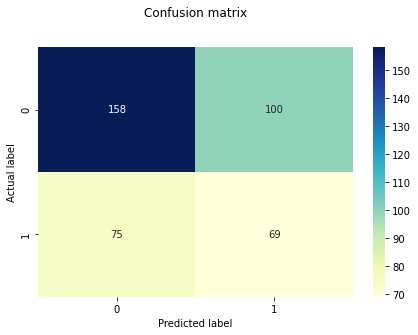

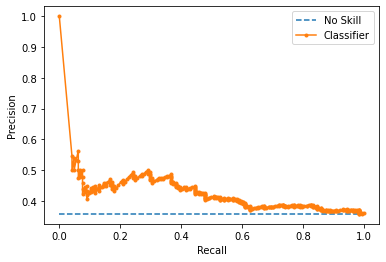

Trait to predict:  agreeableness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.53      0.55      0.54       225
           1       0.40      0.38      0.39       177

    accuracy                           0.48       402
   macro avg       0.46      0.46      0.46       402
weighted avg       0.47      0.48      0.47       402



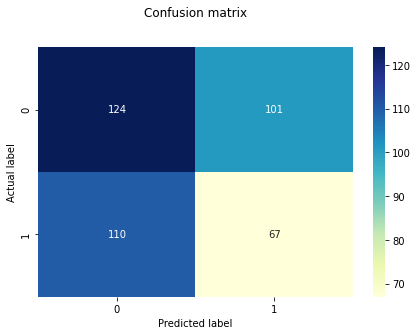

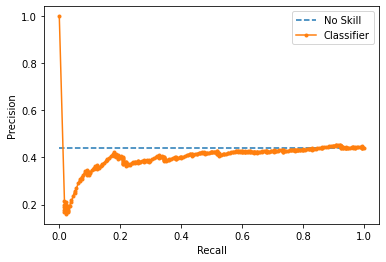

Trait to predict:  neuroticism


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.52      0.47      0.49       201
           1       0.52      0.56      0.54       201

    accuracy                           0.52       402
   macro avg       0.52      0.52      0.52       402
weighted avg       0.52      0.52      0.52       402



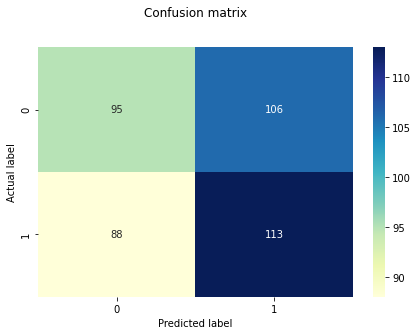

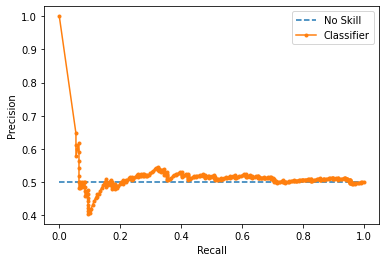

In [19]:
classify(df, 'log', 'binary', plotting=True, weighted=False, detailed=False)

Trait to predict:  openness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.25      0.35      0.29       105
           1       0.73      0.62      0.67       297

    accuracy                           0.55       402
   macro avg       0.49      0.49      0.48       402
weighted avg       0.61      0.55      0.57       402



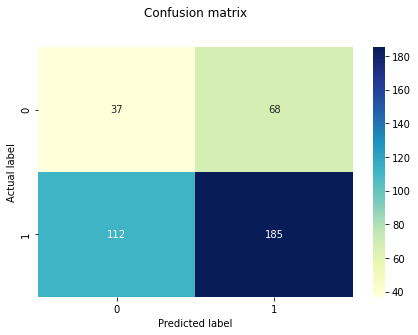

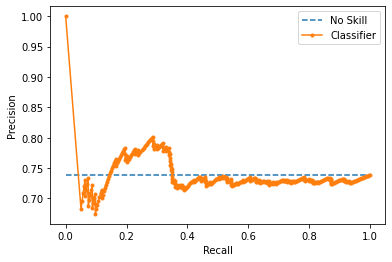

Trait to predict:  conscientiousness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.66      0.66      0.66       251
           1       0.43      0.42      0.43       151

    accuracy                           0.57       402
   macro avg       0.54      0.54      0.54       402
weighted avg       0.57      0.57      0.57       402



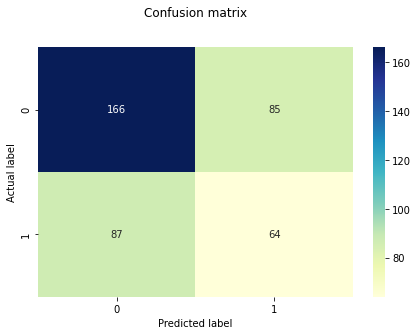

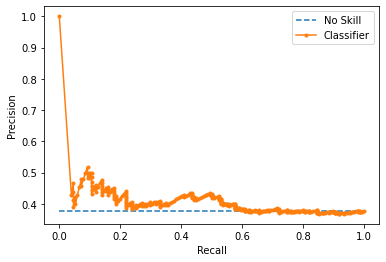

Trait to predict:  extraversion


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.68      0.61      0.64       258
           1       0.41      0.48      0.44       144

    accuracy                           0.56       402
   macro avg       0.54      0.55      0.54       402
weighted avg       0.58      0.56      0.57       402



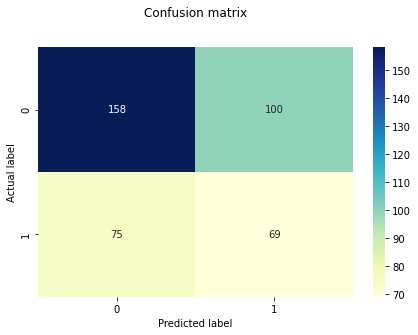

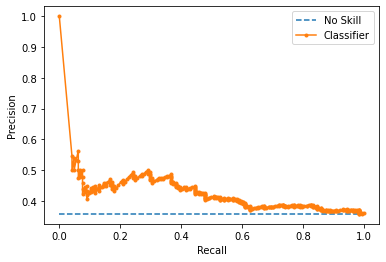

Trait to predict:  agreeableness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.53      0.55      0.54       225
           1       0.40      0.38      0.39       177

    accuracy                           0.48       402
   macro avg       0.46      0.46      0.46       402
weighted avg       0.47      0.48      0.47       402



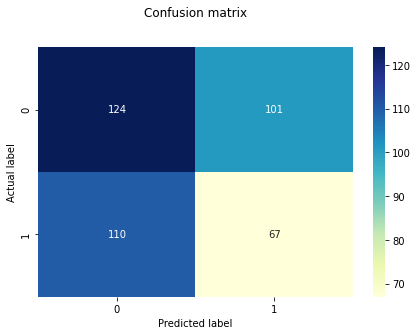

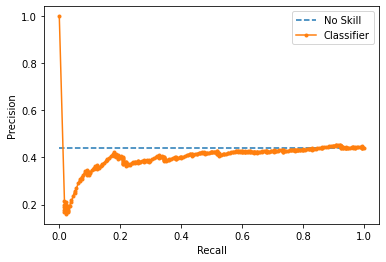

Trait to predict:  neuroticism


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.52      0.47      0.49       201
           1       0.52      0.56      0.54       201

    accuracy                           0.52       402
   macro avg       0.52      0.52      0.52       402
weighted avg       0.52      0.52      0.52       402



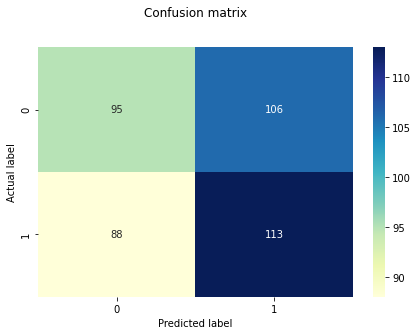

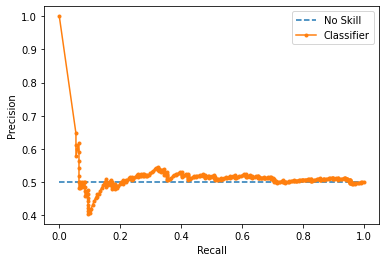

In [20]:
classify(df, 'log', 'binary', plotting=True, weighted=True, detailed=False)

## Test set: outcome has 5 classes

In [21]:
classify(df, 'multilog', 'multi', plotting=True, weighted=True, detailed=False)

Trait to predict:  openness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.17      0.35      0.23        43
           1       0.06      0.11      0.08        35
           2       0.14      0.09      0.11        66
           3       0.33      0.25      0.28       101
           4       0.45      0.38      0.41       157

    accuracy                           0.27       402
   macro avg       0.23      0.24      0.22       402
weighted avg       0.30      0.27      0.28       402

Trait to predict:  conscientiousness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.41      0.35      0.38       144
           1       0.18      0.22      0.20        63
           2       0.21      0.24      0.22        80
           3       0.17      0.17      0.17        47
           4       0.11      0.10      0.10        68

    accuracy                           0.24       402
   macro avg       0.22      0.22      0.21       402
weighted avg       0.26      0.24      0.25       402

Trait to predict:  extraversion


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.48      0.28      0.35       168
           1       0.19      0.24      0.21        62
           2       0.26      0.25      0.26        73
           3       0.08      0.16      0.11        44
           4       0.17      0.22      0.19        55

    accuracy                           0.25       402
   macro avg       0.24      0.23      0.22       402
weighted avg       0.31      0.25      0.26       402

Trait to predict:  agreeableness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.35      0.33      0.34       138
           1       0.17      0.19      0.18        59
           2       0.17      0.17      0.17        69
           3       0.13      0.14      0.14        66
           4       0.13      0.13      0.13        70

    accuracy                           0.22       402
   macro avg       0.19      0.19      0.19       402
weighted avg       0.22      0.22      0.22       402

Trait to predict:  neuroticism


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.26      0.26      0.26       101
           1       0.10      0.12      0.11        57
           2       0.18      0.16      0.17        75
           3       0.21      0.25      0.22        61
           4       0.32      0.26      0.29       108

    accuracy                           0.22       402
   macro avg       0.21      0.21      0.21       402
weighted avg       0.23      0.22      0.22       402



# Results of the train set

In [22]:
def classify_trainset(df, classifier, classes, plotting, weighted, detailed=False):
    for trait_name in traits:
#         num_feat = switching(trait_name)
        num_feat = 30
        print("Trait to predict: ", trait_name)
        if classes == 'binary':
            x,y = trait(df, 'binary',trait_name)
        else:
            x,y = trait(df, 'multi', trait_name)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
        if detailed:
            print("Number of authors in y_train: ", len(y_train))
            print("Number of authors in y_test: ", len(y_test))
        logpipe = create_pipeline(x_train, y_train, classifier, num_feat)
        y_pred=logpipe.predict(x_train)
        if detailed:
            print("Number of authors in y_pred: ", len(y_pred))
            names = get_names(x, logpipe)
            print("Names of the top", len(names), "features: \n", names, "\n")
            pvalues = get_pvalues(logpipe, x)
        #     print("p-values of", len(pvalues), "features: \n", pvalues, "\n")
            if trait_name=="openness":
                count = pvalues['pvalue'].le(0.02).sum()
            if trait_name=="conscientiousness":
                count = pvalues['pvalue'].le(0.07).sum()
            if trait_name=="extraversion":
                count = pvalues['pvalue'].le(0.05).sum()
            if trait_name=="agreeableness":
                count = pvalues['pvalue'].le(0.04).sum()
            if trait_name=="neuroticism":
                count = pvalues['pvalue'].le(0.04).sum()
            print("Number of features with this threshold: ", count)
    #         print("\nP-Values: \nNumber of features: ", 30)
    #         print(pvalues.nsmallest(count,'pvalue'))
            print("\n")

        report = scores(y_train, y_pred, "report")
        print("Classification report: \n", report)
        if (plotting and classes == 'binary'):
            cnfmatrix = create_cnfmatrix(y_train, y_pred, plotting, detailed) 
    #     accuracy, precision, recall, f_one = scores(y_test, y_pred, "scores")
    #     print("Scores:\nAccuracy:",accuracy, "\nPrecision:",precision, "\nRecall:",recall, "\nF1 score:",f_one)
            if classifier == 'log':
                lr_precision, lr_recall = score_plot(logpipe, y_train, x_train)
    #     print("Scores:\nLR_Precision:",lr_precision, "\nLR_Recall:",lr_recall)

## Train set: binary outcome

Trait to predict:  openness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.63      0.26      0.37       355
           1       0.75      0.94      0.83       849

    accuracy                           0.74      1204
   macro avg       0.69      0.60      0.60      1204
weighted avg       0.72      0.74      0.70      1204



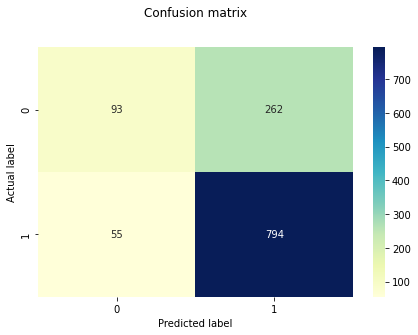

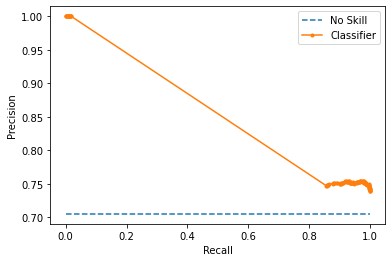

Trait to predict:  conscientiousness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.69      0.76      0.72       746
           1       0.53      0.43      0.47       458

    accuracy                           0.64      1204
   macro avg       0.61      0.60      0.60      1204
weighted avg       0.62      0.64      0.63      1204



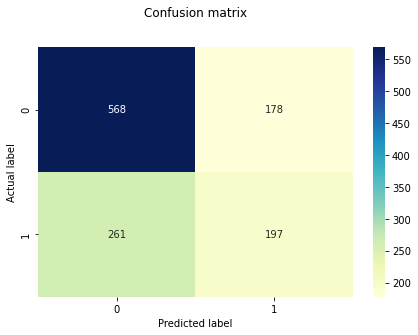

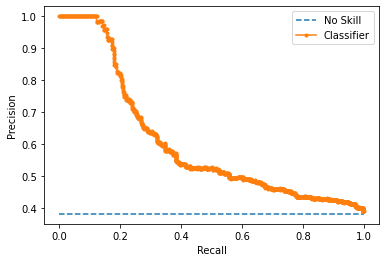

Trait to predict:  extraversion


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.72      0.92      0.81       779
           1       0.69      0.33      0.45       425

    accuracy                           0.71      1204
   macro avg       0.70      0.63      0.63      1204
weighted avg       0.71      0.71      0.68      1204



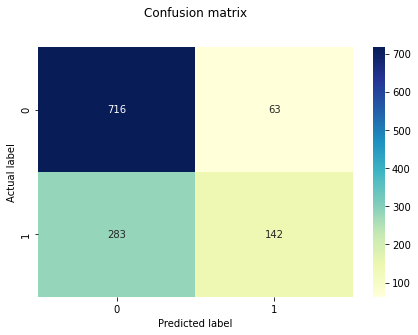

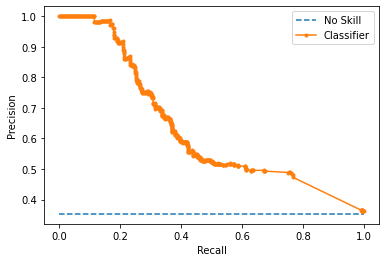

Trait to predict:  agreeableness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.68      0.73      0.70       680
           1       0.61      0.56      0.58       524

    accuracy                           0.65      1204
   macro avg       0.65      0.64      0.64      1204
weighted avg       0.65      0.65      0.65      1204



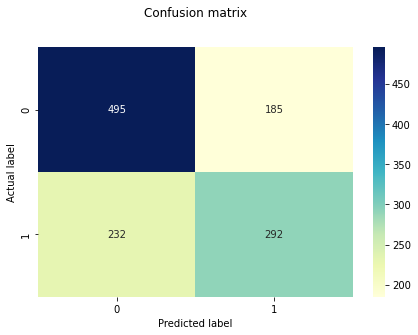

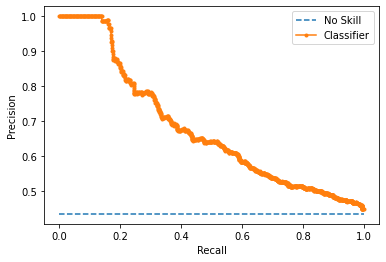

Trait to predict:  neuroticism


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.58      0.72      0.65       592
           1       0.65      0.50      0.57       612

    accuracy                           0.61      1204
   macro avg       0.62      0.61      0.61      1204
weighted avg       0.62      0.61      0.61      1204



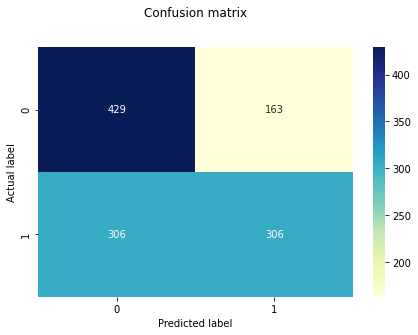

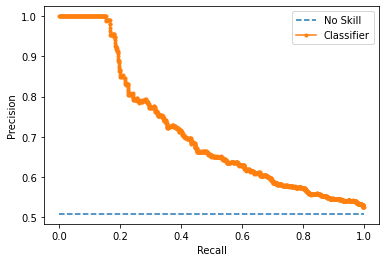

In [23]:
classify_trainset(df, 'log', 'binary', plotting=True, weighted=True, detailed=False)

## Train set: outcome has 5 classes

In [24]:
classify_trainset(df, 'multilog', 'multi', plotting=True, weighted=True, detailed=False)

Trait to predict:  openness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.71      0.22      0.33       158
           1       0.69      0.16      0.26       124
           2       0.46      0.14      0.21       205
           3       0.23      0.94      0.36       250
           4       0.38      0.02      0.04       467

    accuracy                           0.27      1204
   macro avg       0.49      0.29      0.24      1204
weighted avg       0.43      0.27      0.20      1204

Trait to predict:  conscientiousness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.41      0.28      0.33       416
           1       0.36      0.24      0.29       236
           2       0.19      0.17      0.18       196
           3       0.29      0.41      0.34       145
           4       0.23      0.42      0.30       211

    accuracy                           0.29      1204
   macro avg       0.30      0.30      0.29      1204
weighted avg       0.32      0.29      0.29      1204

Trait to predict:  extraversion


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.46      0.85      0.59       477
           1       0.26      0.12      0.16       219
           2       0.44      0.19      0.26       193
           3       0.56      0.25      0.35       132
           4       0.38      0.15      0.22       183

    accuracy                           0.44      1204
   macro avg       0.42      0.31      0.32      1204
weighted avg       0.42      0.44      0.38      1204

Trait to predict:  agreeableness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.38      0.48      0.43       394
           1       0.23      0.44      0.30       211
           2       0.55      0.12      0.19       204
           3       0.52      0.22      0.31       181
           4       0.33      0.27      0.30       214

    accuracy                           0.34      1204
   macro avg       0.40      0.31      0.31      1204
weighted avg       0.39      0.34      0.32      1204

Trait to predict:  neuroticism


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.32      0.59      0.42       317
           1       0.39      0.10      0.17       172
           2       0.49      0.17      0.25       198
           3       0.51      0.21      0.30       169
           4       0.38      0.49      0.43       348

    accuracy                           0.37      1204
   macro avg       0.42      0.31      0.31      1204
weighted avg       0.40      0.37      0.34      1204



# Results without predictor subreddit

##  binary log (without subreddit)

Trait to predict:  openness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.29      0.62      0.39       105
           1       0.77      0.45      0.57       297

    accuracy                           0.50       402
   macro avg       0.53      0.54      0.48       402
weighted avg       0.64      0.50      0.52       402



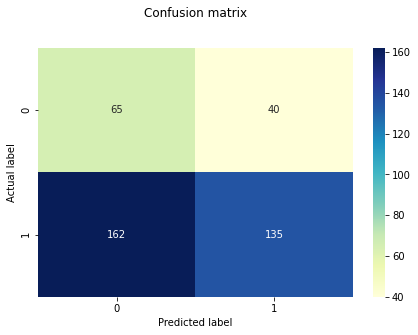

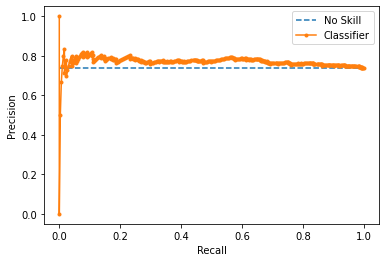

Trait to predict:  conscientiousness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.65      0.45      0.53       251
           1       0.39      0.59      0.47       151

    accuracy                           0.50       402
   macro avg       0.52      0.52      0.50       402
weighted avg       0.55      0.50      0.51       402



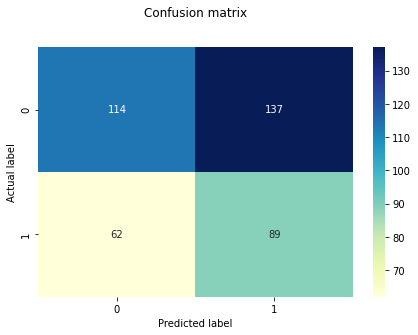

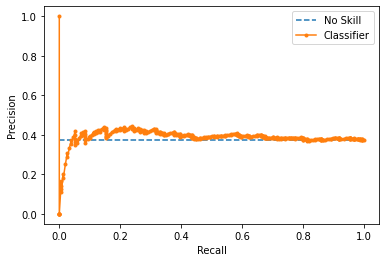

Trait to predict:  extraversion


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.66      0.53      0.59       258
           1       0.38      0.51      0.44       144

    accuracy                           0.52       402
   macro avg       0.52      0.52      0.51       402
weighted avg       0.56      0.52      0.53       402



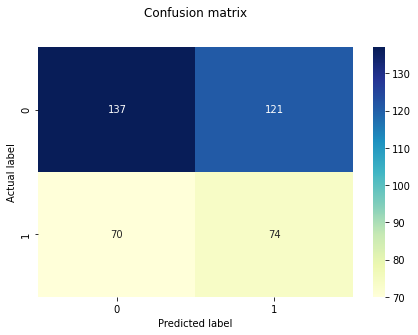

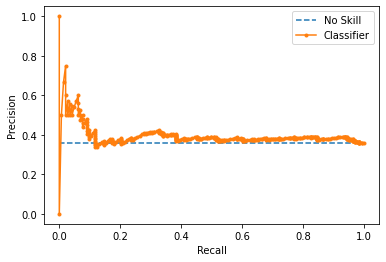

Trait to predict:  agreeableness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.62      0.52      0.56       225
           1       0.50      0.60      0.54       177

    accuracy                           0.55       402
   macro avg       0.56      0.56      0.55       402
weighted avg       0.57      0.55      0.56       402



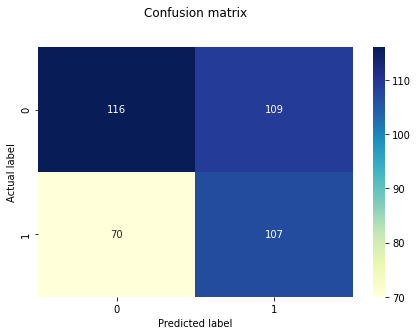

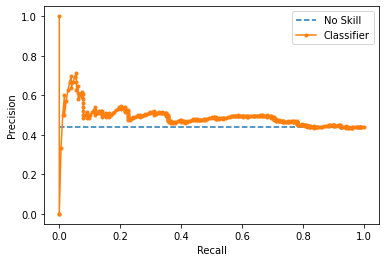

Trait to predict:  neuroticism


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.53      0.52      0.53       201
           1       0.53      0.55      0.54       201

    accuracy                           0.53       402
   macro avg       0.53      0.53      0.53       402
weighted avg       0.53      0.53      0.53       402



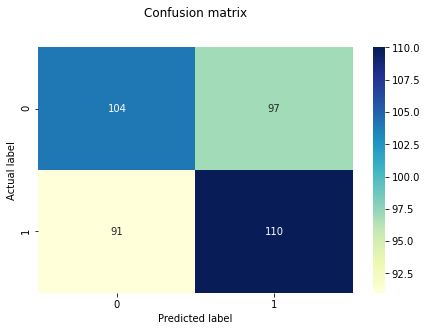

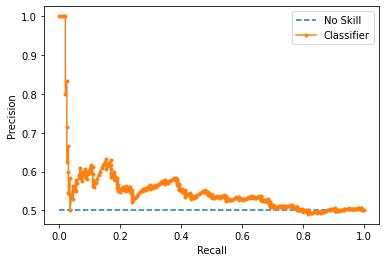

In [25]:
classify(smalldf, 'log', 'binary', plotting=True, weighted=True, detailed=False)

## multi log (without subreddit)

In [26]:
classify(smalldf, 'multilog', 'multi', plotting=True, weighted=True, detailed=False)

Trait to predict:  openness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.11      0.21      0.14        43
           1       0.08      0.26      0.12        35
           2       0.25      0.27      0.26        66
           3       0.30      0.21      0.25       101
           4       0.41      0.17      0.24       157

    accuracy                           0.21       402
   macro avg       0.23      0.22      0.20       402
weighted avg       0.29      0.21      0.22       402

Trait to predict:  conscientiousness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.37      0.16      0.22       144
           1       0.11      0.11      0.11        63
           2       0.16      0.21      0.18        80
           3       0.16      0.30      0.21        47
           4       0.20      0.25      0.22        68

    accuracy                           0.19       402
   macro avg       0.20      0.21      0.19       402
weighted avg       0.24      0.19      0.20       402

Trait to predict:  extraversion


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.47      0.24      0.31       168
           1       0.11      0.11      0.11        62
           2       0.16      0.18      0.17        73
           3       0.08      0.11      0.09        44
           4       0.13      0.27      0.18        55

    accuracy                           0.20       402
   macro avg       0.19      0.18      0.17       402
weighted avg       0.27      0.20      0.21       402

Trait to predict:  agreeableness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.42      0.22      0.29       138
           1       0.16      0.29      0.21        59
           2       0.12      0.10      0.11        69
           3       0.15      0.23      0.18        66
           4       0.19      0.17      0.18        70

    accuracy                           0.20       402
   macro avg       0.21      0.20      0.19       402
weighted avg       0.25      0.20      0.21       402

Trait to predict:  neuroticism


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.34      0.35      0.34       101
           1       0.15      0.28      0.19        57
           2       0.21      0.12      0.15        75
           3       0.15      0.16      0.16        61
           4       0.31      0.24      0.27       108

    accuracy                           0.24       402
   macro avg       0.23      0.23      0.22       402
weighted avg       0.25      0.24      0.24       402



# Perceptron

Trait to predict:  openness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.29      0.48      0.36       105
           1       0.76      0.59      0.66       297

    accuracy                           0.56       402
   macro avg       0.53      0.53      0.51       402
weighted avg       0.64      0.56      0.58       402



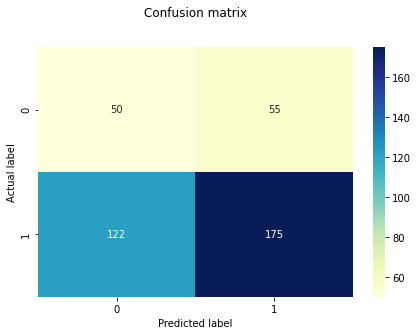

Trait to predict:  conscientiousness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.68      0.54      0.60       251
           1       0.43      0.58      0.50       151

    accuracy                           0.55       402
   macro avg       0.56      0.56      0.55       402
weighted avg       0.59      0.55      0.56       402



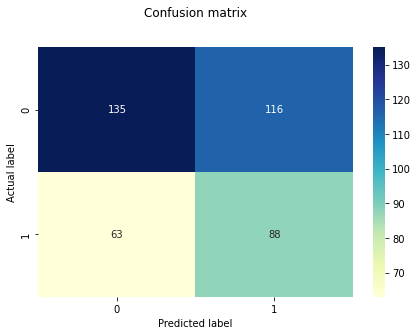

Trait to predict:  extraversion


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.66      0.47      0.55       258
           1       0.37      0.57      0.45       144

    accuracy                           0.50       402
   macro avg       0.52      0.52      0.50       402
weighted avg       0.56      0.50      0.51       402



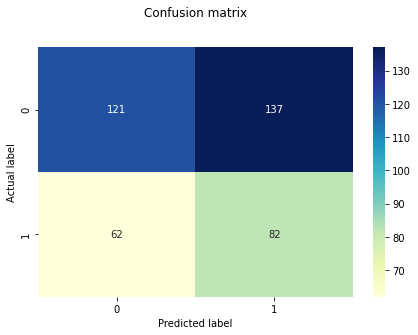

Trait to predict:  agreeableness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.58      0.48      0.53       225
           1       0.46      0.56      0.50       177

    accuracy                           0.51       402
   macro avg       0.52      0.52      0.51       402
weighted avg       0.53      0.51      0.52       402



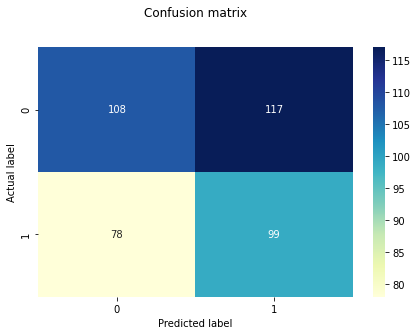

Trait to predict:  neuroticism


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.49      0.57      0.52       201
           1       0.48      0.40      0.44       201

    accuracy                           0.49       402
   macro avg       0.48      0.49      0.48       402
weighted avg       0.48      0.49      0.48       402



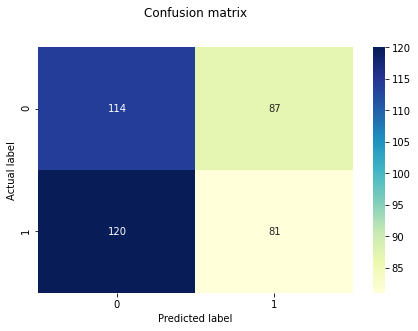

In [27]:
classify(df, 'perceptron', 'binary', plotting=True, weighted=True, detailed=False)

## perceptron (without subreddit)

Trait to predict:  openness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.31      0.38      0.34       105
           1       0.76      0.71      0.73       297

    accuracy                           0.62       402
   macro avg       0.54      0.54      0.54       402
weighted avg       0.65      0.62      0.63       402



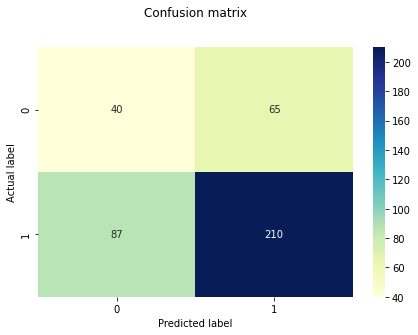

Trait to predict:  conscientiousness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.63      0.69      0.66       251
           1       0.39      0.33      0.36       151

    accuracy                           0.55       402
   macro avg       0.51      0.51      0.51       402
weighted avg       0.54      0.55      0.54       402



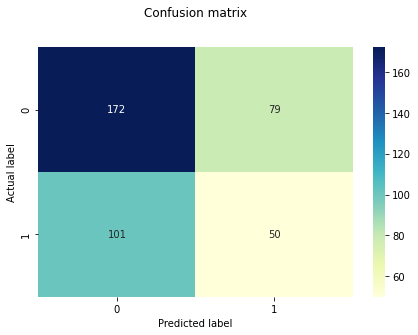

Trait to predict:  extraversion


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.68      0.27      0.39       258
           1       0.37      0.77      0.50       144

    accuracy                           0.45       402
   macro avg       0.53      0.52      0.44       402
weighted avg       0.57      0.45      0.43       402



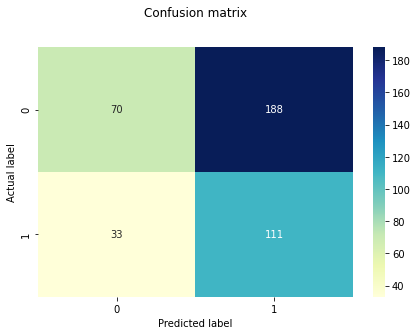

Trait to predict:  agreeableness


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.58      0.30      0.39       225
           1       0.45      0.73      0.56       177

    accuracy                           0.49       402
   macro avg       0.52      0.51      0.48       402
weighted avg       0.52      0.49      0.47       402



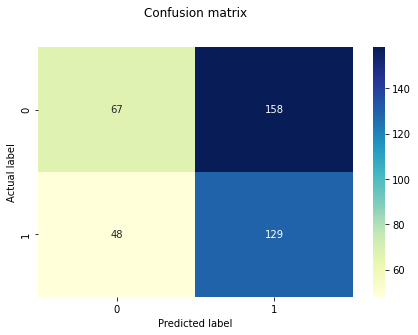

Trait to predict:  neuroticism


/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:78: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)
/home/sophia/ma_py/.venv/lib/python3.8/site-packages/sklearn/feature_selection/_variance_threshold.py:86: RuntimeWarning: All-NaN slice encountered
  self.variances_ = np.nanmin(compare_arr, axis=0)


Classification report: 
               precision    recall  f1-score   support

           0       0.52      0.60      0.56       201
           1       0.53      0.45      0.49       201

    accuracy                           0.52       402
   macro avg       0.53      0.52      0.52       402
weighted avg       0.53      0.52      0.52       402



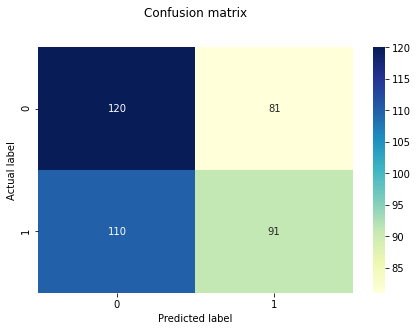

In [28]:
classify(smalldf, 'perceptron', 'binary', plotting=True, weighted=True, detailed=False)